# Demonstrates how to input data and plot 2D field climatologies for many simulations

This script reads in climatologies that were computed and previously saved using ADF (years 10 to 24 of the Fixed SST runs). These are slightly different years than we used in earlier to turn in HW 2, not for any good reason

The examples below are just to get you started. You get to decide what you want to examine after doing a survey of the results below and considering other variable available. See homework assignment for some suggestions.

Near end I show you how to convert from sigma to pressure level

This script has been verified to run with the NPL 2024a environment


variables available in climotologies, any may be plotted easily below since all are together in /glade/derecho/scratch/bitz/ADF/climo \
	float AEROD_v(time, lat, lon) ; \
		AEROD_v:_FillValue = 1.e+36f ; \
		AEROD_v:missing_value = 1.e+36f ; \
		AEROD_v:units = "1" ; \
		AEROD_v:long_name = "Total Aerosol Optical Depth in visible band" ; \
		AEROD_v:cell_methods = "time: mean" ; \
	float CLDHGH(time, lat, lon) ; \
		CLDHGH:units = "fraction" ; \
		CLDHGH:long_name = "Vertically-integrated high cloud" ; \
		CLDHGH:cell_methods = "time: mean" ; \
	float CLDLOW(time, lat, lon) ; \
		CLDLOW:units = "fraction" ; \
		CLDLOW:long_name = "Vertically-integrated low cloud" ; \
		CLDLOW:cell_methods = "time: mean" ; \
	float CLDMED(time, lat, lon) ; \
		CLDMED:units = "fraction" ; \
		CLDMED:long_name = "Vertically-integrated mid-level cloud" ; \
		CLDMED:cell_methods = "time: mean" ; \
	float CLOUD(time, lev, lat, lon) ; \
		CLOUD:mdims = 1 ; \
		CLOUD:units = "fraction" ; \
		CLOUD:long_name = "Cloud fraction" ; \
		CLOUD:cell_methods = "time: mean" ; \
    float FLNS(time, lat, lon) ; \ 
		FLNS:Sampling_Sequence = "rad_lwsw" ; \
		FLNS:units = "W/m2" ; \
		FLNS:long_name = "Net longwave flux at surface" ; \
		FLNS:cell_methods = "time: mean" ; \
	float FLNT(time, lat, lon) ; \
		FLNT:Sampling_Sequence = "rad_lwsw" ; \
		FLNT:units = "W/m2" ; \
		FLNT:long_name = "Net longwave flux at top of model" ; \
		FLNT:cell_methods = "time: mean" ; \
	float FLUT(time, lat, lon) ; \
		FLUT:Sampling_Sequence = "rad_lwsw" ; \
		FLUT:units = "W/m2" ; \
		FLUT:long_name = "Upwelling longwave flux at top of model" ; \
		FLUT:cell_methods = "time: mean" ; \
	float FSNS(time, lat, lon) ; \
		FSNS:Sampling_Sequence = "rad_lwsw" ; \
		FSNS:units = "W/m2" ; \
		FSNS:long_name = "Net solar flux at surface" ; \
		FSNS:cell_methods = "time: mean" ; \
	float FSNT(time, lat, lon) ; \
		FSNT:Sampling_Sequence = "rad_lwsw" ; \
		FSNT:units = "W/m2" ; \
		FSNT:long_name = "Net solar flux at top of model" ; \
		FSNT:cell_methods = "time: mean" ; \
	float LWCF(time, lat, lon) ; \
		LWCF:Sampling_Sequence = "rad_lwsw" ; \
		LWCF:units = "W/m2" ; \
		LWCF:long_name = "Longwave cloud forcing" ; \
		LWCF:cell_methods = "time: mean" ; \
	float PRECC(time, lat, lon) ; \
		PRECC:units = "m/s" ; \
		PRECC:long_name = "Convective precipitation rate (liq + ice)" ; \
		PRECC:cell_methods = "time: mean" ; \
	float PRECL(time, lat, lon) ; \
		PRECL:units = "m/s" ; \
		PRECL:long_name = "Larg e-scale (stable) precipitation rate (liq + ice)" ; \
		PRECL:cell_methods = "time: mean" ; \
	float PSL(time, lat, lon) ; \
		PSL:units = "Pa" ; \
		PSL:long_name = "Sea level pressure" ; \
		PSL:cell_methods = "time: mean" ; \
	float Q(time, lev, lat, lon) ; \
		Q:mdims = 1 ; \
		Q:units = "kg/kg" ; \
		Q:mixing_ratio = "wet" ; \
		Q:long_name = "Specific humidity" ; \
		Q:cell_methods = "time: mean" ; \
	float QRL(time, lev, lat, lon) ; \
		QRL:mdims = 1 ; \
		QRL:Sampling_Sequence = "rad_lwsw" ; \
		QRL:units = "K/s" ; \
		QRL:long_name = "Longwave heating rate" ; \
		QRL:cell_methods = "time: mean" ; \
	float QRS(time, lev, lat, lon) ; \
		QRS:mdims = 1 ; \
		QRS:Sampling_Sequence = "rad_lwsw" ; \
		QRS:units = "K/s" ; \
		QRS:long_name = "Solar heating rate" ; \
		QRS:cell_methods = "time: mean" ; \
	float RELHUM(time, lev, lat, lon) ; \
		RELHUM:mdims = 1 ; \
		RELHUM:units = "percent" ; \
		RELHUM:long_name = "Relative humidity" ; \
		RELHUM:cell_methods = "time: mean" ; \
	float SWCF(time, lat, lon) ; \
		SWCF:Sampling_Sequence = "rad_lwsw" ; \
		SWCF:units = "W/m2" ; \
		SWCF:long_name = "Shortwave cloud forcing" ; \
		SWCF:cell_methods = "time: mean" ; \
	float T(time, lev, lat, lon) ; \
		T:mdims = 1 ; \
		T:units = "K" ; \
		T:long_name = "Temperature" ; \
		T:cell_methods = "time: mean" ; \
	float TAUX(time, lat, lon) ; \
		TAUX:units = "N/m2" ; \
		TAUX:long_name = "Zonal surface stress" ; \
		TAUX:cell_methods = "time: mean" ; \
	float TAUY(time, lat, lon) ; \
		TAUY:units = "N/m2" ; \
		TAUY:long_name = "Meridional surface stress" ; \
		TAUY:cell_methods = "time: mean" ; \
	float TREFHT(time, lat, lon) ; \
		TREFHT:units = "K" ; \ 
		TREFHT:long_name = "Reference height temperature" ; \
		TREFHT:cell_methods = "time: mean" ; \
	float U(time, lev, lat, lon) ; \
		U:mdims = 1 ; \
		U:units = "m/s" ; \
		U:long_name = "Zonal wind" ; \
		U:cell_methods = "time: mean" ; 

You can plot many more variables that are included here. First find out if there is one you want to examine by dumping the header of a history file. Do this by
going to where the history files are archived, something like /glade/derecho/scratch/username/archive/casename/atm/hist. Then type "ncdump -h " followed by a history filename. 
Find out where data are from the spreadsheet with all our runs listed at
https://docs.google.com/spreadsheets/d/1jSidYNikpVIooAFPwnfpYOBUq0ZY6AQ-kiBqEHCBEik/edit#gid=0

The challenge is to extract the data and make a climatology. You can do it in python, 
If you need an example, refer to the TOA_ERF_ECS.ipynb script that I provided for HW2

If you want to see a 3D variable (like V, or VT) it may be super slow and memory intensive. You can also run a script I created called 
ClassRunClimoMaker.csh  

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload
import matplotlib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.colors as colors

import numpy as np
import xarray as xr

In [31]:
def AnnualField(ddir,casename,thevar):   # read in one field at a time for a single case
    ncfile=ddir+casename+'_'+thevar+'_climo.nc'
    x=xr.open_dataset(ncfile)[thevar]
    x=x.mean(dim='time')  # this is annual, could look at seasonal or values by month, as you wish
    return x

def AnnualFields(ddir,casename,thevar):   # read in all fields at a time for a single case
    ncfile=ddir+casename+'_'+thevar+'_climo.nc'
    x=xr.open_dataset(ncfile)
    x=x.mean(dim='time')  # this is annual, could look at seasonal or values by month, as you wish
    return x

def CombineFieldNicely(ddir,casenames,prefernames,thevar):  # combine the cases for one variable into a nice xarray DataArray
    x_all=[]
    for i,casename in enumerate(casenames):
        x = AnnualField(ddir,casename,thevar)
        x = x.assign_coords(casename=prefernames[i])
        x = x.expand_dims('casename')
        x.name=thevar
        x_all.append(x)
    x_all=xr.concat(x_all, "casename")
    return x_all

def CombineDSNicely(ddir,casenames,prefernames,thevar):  # combine the cases for a few variables into a nice xarray DataSet
    x_all=[]
    for i,casename in enumerate(casenames):
        x = AnnualFields(ddir,casename,thevar)
        x = x.assign_coords(casename=prefernames[i])
        x = x.expand_dims('casename')
        x_all.append(x)
    x_all=xr.concat(x_all, "casename")
    return x_all

def compute_global(da,gw): # multiply by so-called Gaussian weights that oddly enough sum to 2
    globalmean=(da.mean(dim='lon')*gw).sum(dim='lat')/2
    return globalmean

# get Gaussian Weights, gw, from any old cam hist file, a bit slow, sorry
gw=xr.open_dataset('/glade/derecho/scratch/bitz/archive/AMIPpiControl/atm/hist/AMIPpiControl.cam.h0.0001-01.nc').gw

# individual plots
def plotprojection(field,vmax=120,title=''):
    # Create figure with PlateCarree projection
    projection = ccrs.Robinson(central_longitude=0)
    transform = ccrs.PlateCarree(central_longitude=0)
    fig, axs = plt.subplots(1, 1, figsize=(2.2, 1.5), 
        subplot_kw=dict(projection=projection),
        dpi=300)
    mesh = axs.pcolormesh(field.lon.data, field.lat.data, 
                             field.data, cmap='coolwarm',
                             transform=transform, vmin=-vmax, vmax=vmax)
    cbar = plt.colorbar(mesh, ax=axs, orientation='horizontal', shrink=0.95, pad=0.05)
    cbar.set_label(title,size=4)
    cbar.ax.tick_params(labelsize=4)
    cbar.ax.set_xscale('linear')
    axs.coastlines()
    return

def plotAll_Anomalies(imbalance_all,vmax=15,title='TOM Flux Imbalance aka ERF from Fixed SST Runs $W~m^{-2}$'):
    projection = ccrs.Robinson(central_longitude=0)
    transform = ccrs.PlateCarree(central_longitude=0)
    fig, axs = plt.subplots(3, 4, figsize=(12, 8), 
        subplot_kw=dict(projection=projection),
        dpi=300)
    axs = axs.reshape(-1)
    globmean=np.zeros(12)
    for i,casename in enumerate(imbalance_all.casename[1:]):
        field = imbalance_all.sel(casename=casename)-imbalance_all.sel(casename='piControl')
        mesh = axs[i].pcolormesh(field.lon.data, field.lat.data, 
                                 field.data, cmap='coolwarm', vmin=-vmax, vmax=vmax,
                                 transform=transform)
        axs[i].coastlines()
        globmean[i]=compute_global(field,gw)
        axs[i].set_title(str(casename.values)+' Global Mean '+ "{:.2f}".format(globmean[i]),size=10)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0.1)
    cbar_ax = fig.add_axes([0.23, 0.12,  0.6, 0.02])
    cbar = plt.colorbar(mesh, cax=cbar_ax, orientation='horizontal', shrink=0.95, pad=0.05)
    cbar.set_label(title,size=10)
    cbar.ax.tick_params(labelsize=10)
    cbar.ax.set_xscale('linear')
    
    return fig,globmean


In [3]:
# Fixed SST runs
ddirSST = '/glade/derecho/scratch/bitz/ADF/climo/FixedSST/'  # this is where the climatologies are

# these are the casenames used for FixedSST runs
casenamesSST = ["AMIPpiControl",
            "DoubleCO2FixedSST",
            "QuadrupleCO2FixedSST",
            "AlotofCH4FixedSST",
            "RaiseSolarFixedSST",
            "solar_decrease1",
            "DirtyAirFixedSST",
            "IcyNAFixedSST",
            "DarkSeaIceFixedSST",
            "NoTreesFixedSST",
            "fixedSSTFlatTibet",
            "FlatAntarcticaFixedSST",
            "FlatRockiesFixedSST"]

# Fully Coupled 
ddir = '/glade/derecho/scratch/bitz/ADF/climo/FullyCoupled/'  # this is where the climatologies are

# these are the casenames used for fully coupled runs
casenames = ["b.e21.B1850.f19_g17.CMIP6-piControl-2deg.001",
            "DoubleCO2",
            "b.e21.BCO2x4.f19_g17.CMIP6-abrupt4xCO2-2deg.001",
            "AlotofCH4",
            "RaiseSolar",
            "LowerSolar",
            "DirtyAir",
            "IcyNA",
            "DarkIce",
            "NoTrees",
            "FlatTibet",
            "FlatAntarctica",
            "FlatRockies"]

# this is what they were meant to be named
prefernames = ["piControl",
            "DoubleCO2",
            "QuadrupleCO2",
            "AlotofCH4",
            "RaiseSolar",
            "LowerSolar",
            "DirtyAir",
            "IcyNA",
            "DarkSeaIce",
            "NoTrees",
            "FlatTibet",
            "FlatTibet-Antarctica",
            "FlatTibet-Antarctica-Rockies"]

In [22]:
# Get a field from a single CAM variable like trefht
trefht_all_SST=CombineFieldNicely(ddirSST,casenamesSST,prefernames,'TREFHT')
print('\n\nYou just acquired all TREFHT from Fixed SST runs combined together!\n\n')
#print(trefht_all)

# Get a field from a single CAM variable like trefht
trefht_all=CombineFieldNicely(ddir,casenames,prefernames,'TREFHT')
print('\n\nYou just acquired all TREFHT from Fully Coupled runs combined together!\n\n')



You just acquired all TREFHT from Fixed SST runs combined together!




You just acquired all TREFHT from Fully Coupled runs combined together!




In [15]:
# Get a field by combininb CAM variable like TOM imbalance, we'll difference it from piControl to get ERF
fsnt_all_SST=CombineFieldNicely(ddirSST,casenamesSST,prefernames,'FSNT')
flnt_all_SST=CombineFieldNicely(ddirSST,casenamesSST,prefernames,'FLNT')
imbalance_all_SST=fsnt_all-flnt_all
imbalance_all_SST.name='imbalance'
#imbalance_all # uncomment if you want to see the DataArray 

In [16]:
# Get a field by combining CAM variable like total precipitation
precl_all_SST=CombineFieldNicely(ddirSST,casenamesSST,prefernames,'PRECL')
precc_all_SST=CombineFieldNicely(ddirSST,casenamesSST,prefernames,'PRECC')
prect_all_SST=precl_all+precc_all
prect_all_SST.name='prect'

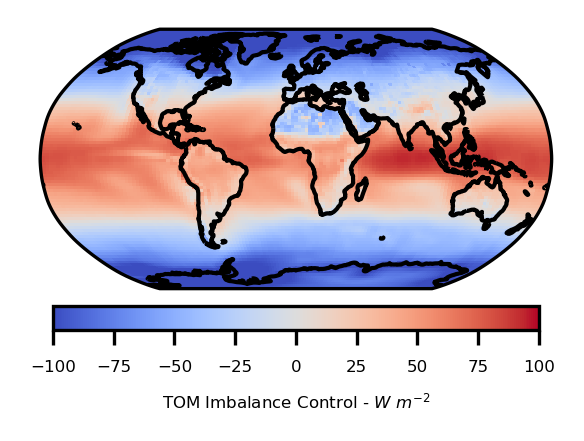

In [18]:
# You can look at these fields one at a time, differences from piControl or raw. Here we plot a raw field
plotprojection(imbalance_all_SST.sel(casename='piControl'),vmax=100,title='TOM Imbalance Control - $W~m^{-2}$')

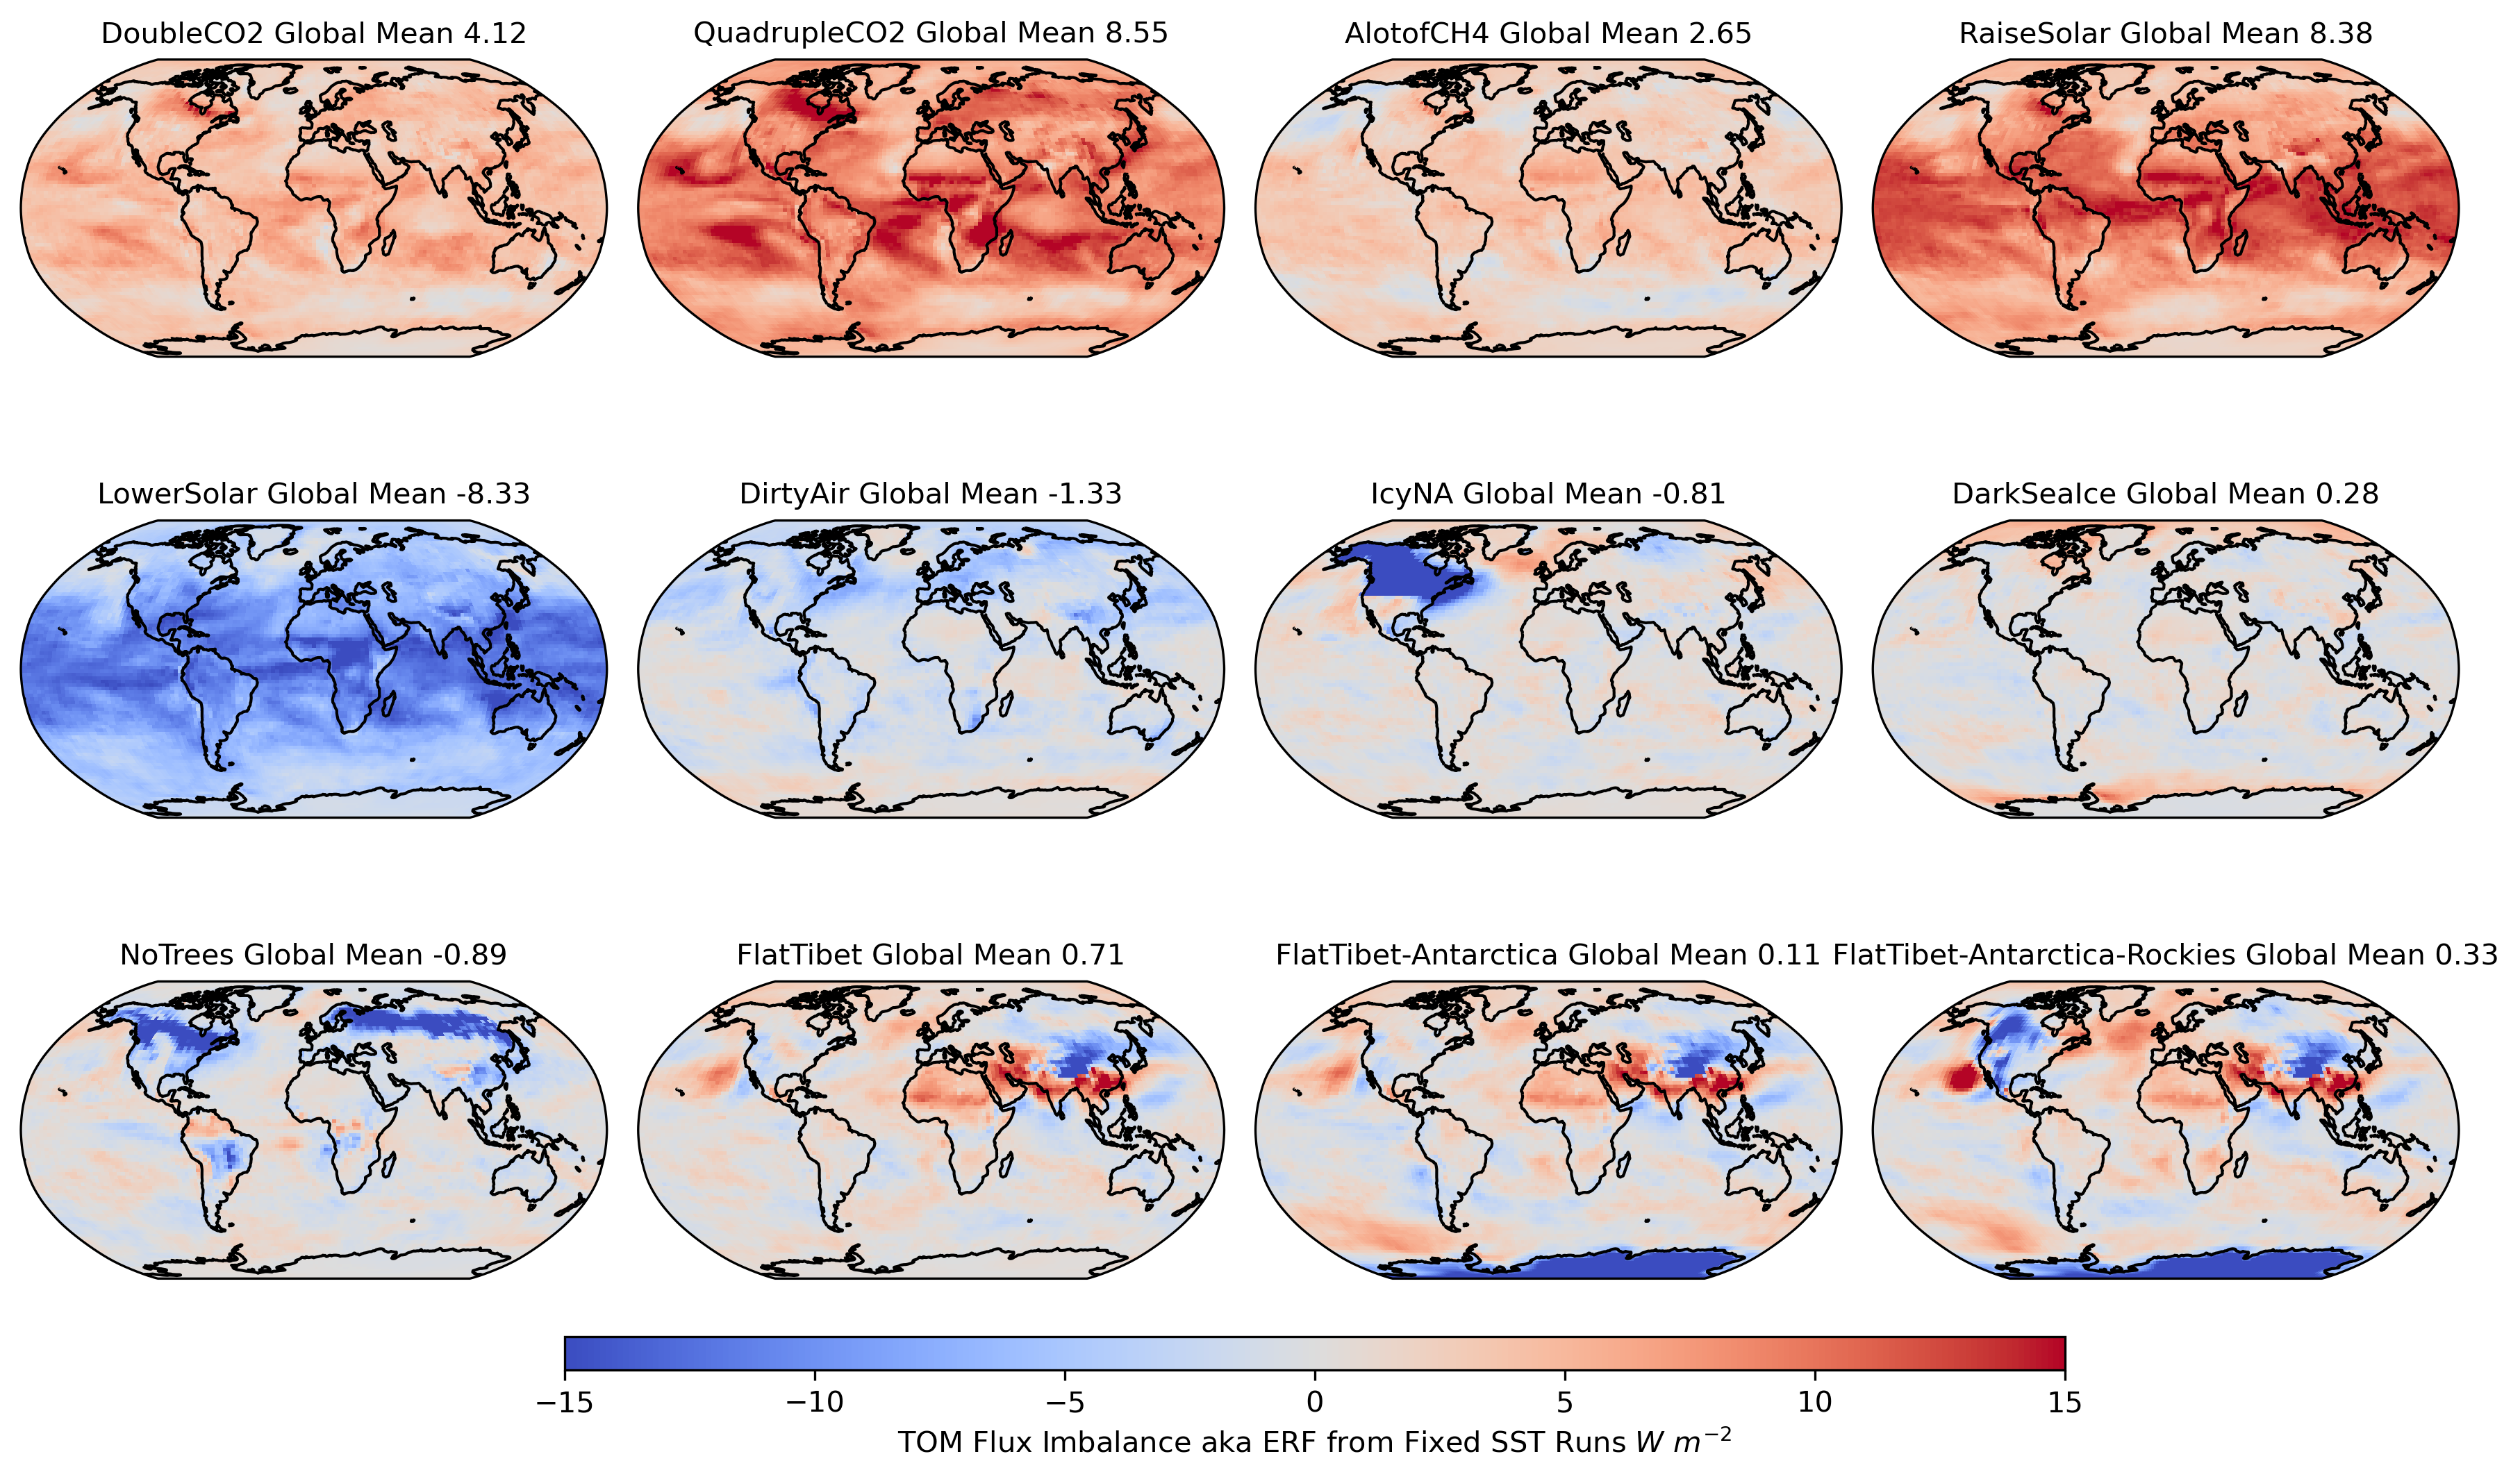

In [19]:
# this will be the ERF, it will take some time to plot
fig,globalmeans = plotAll_Anomalies(imbalance_all_SST,vmax=15,title='TOM Flux Imbalance aka ERF from Fixed SST Runs $W~m^{-2}$')
np.save('TOMImbalance_FixedSST_GlobalMeans', globalmeans) # this saves the global means as a numpy file, easy to read back in later should you wish
fig.savefig('TOMFluxImbalance_FixedSSTRuns.png',
            bbox_inches="tight", dpi=300)


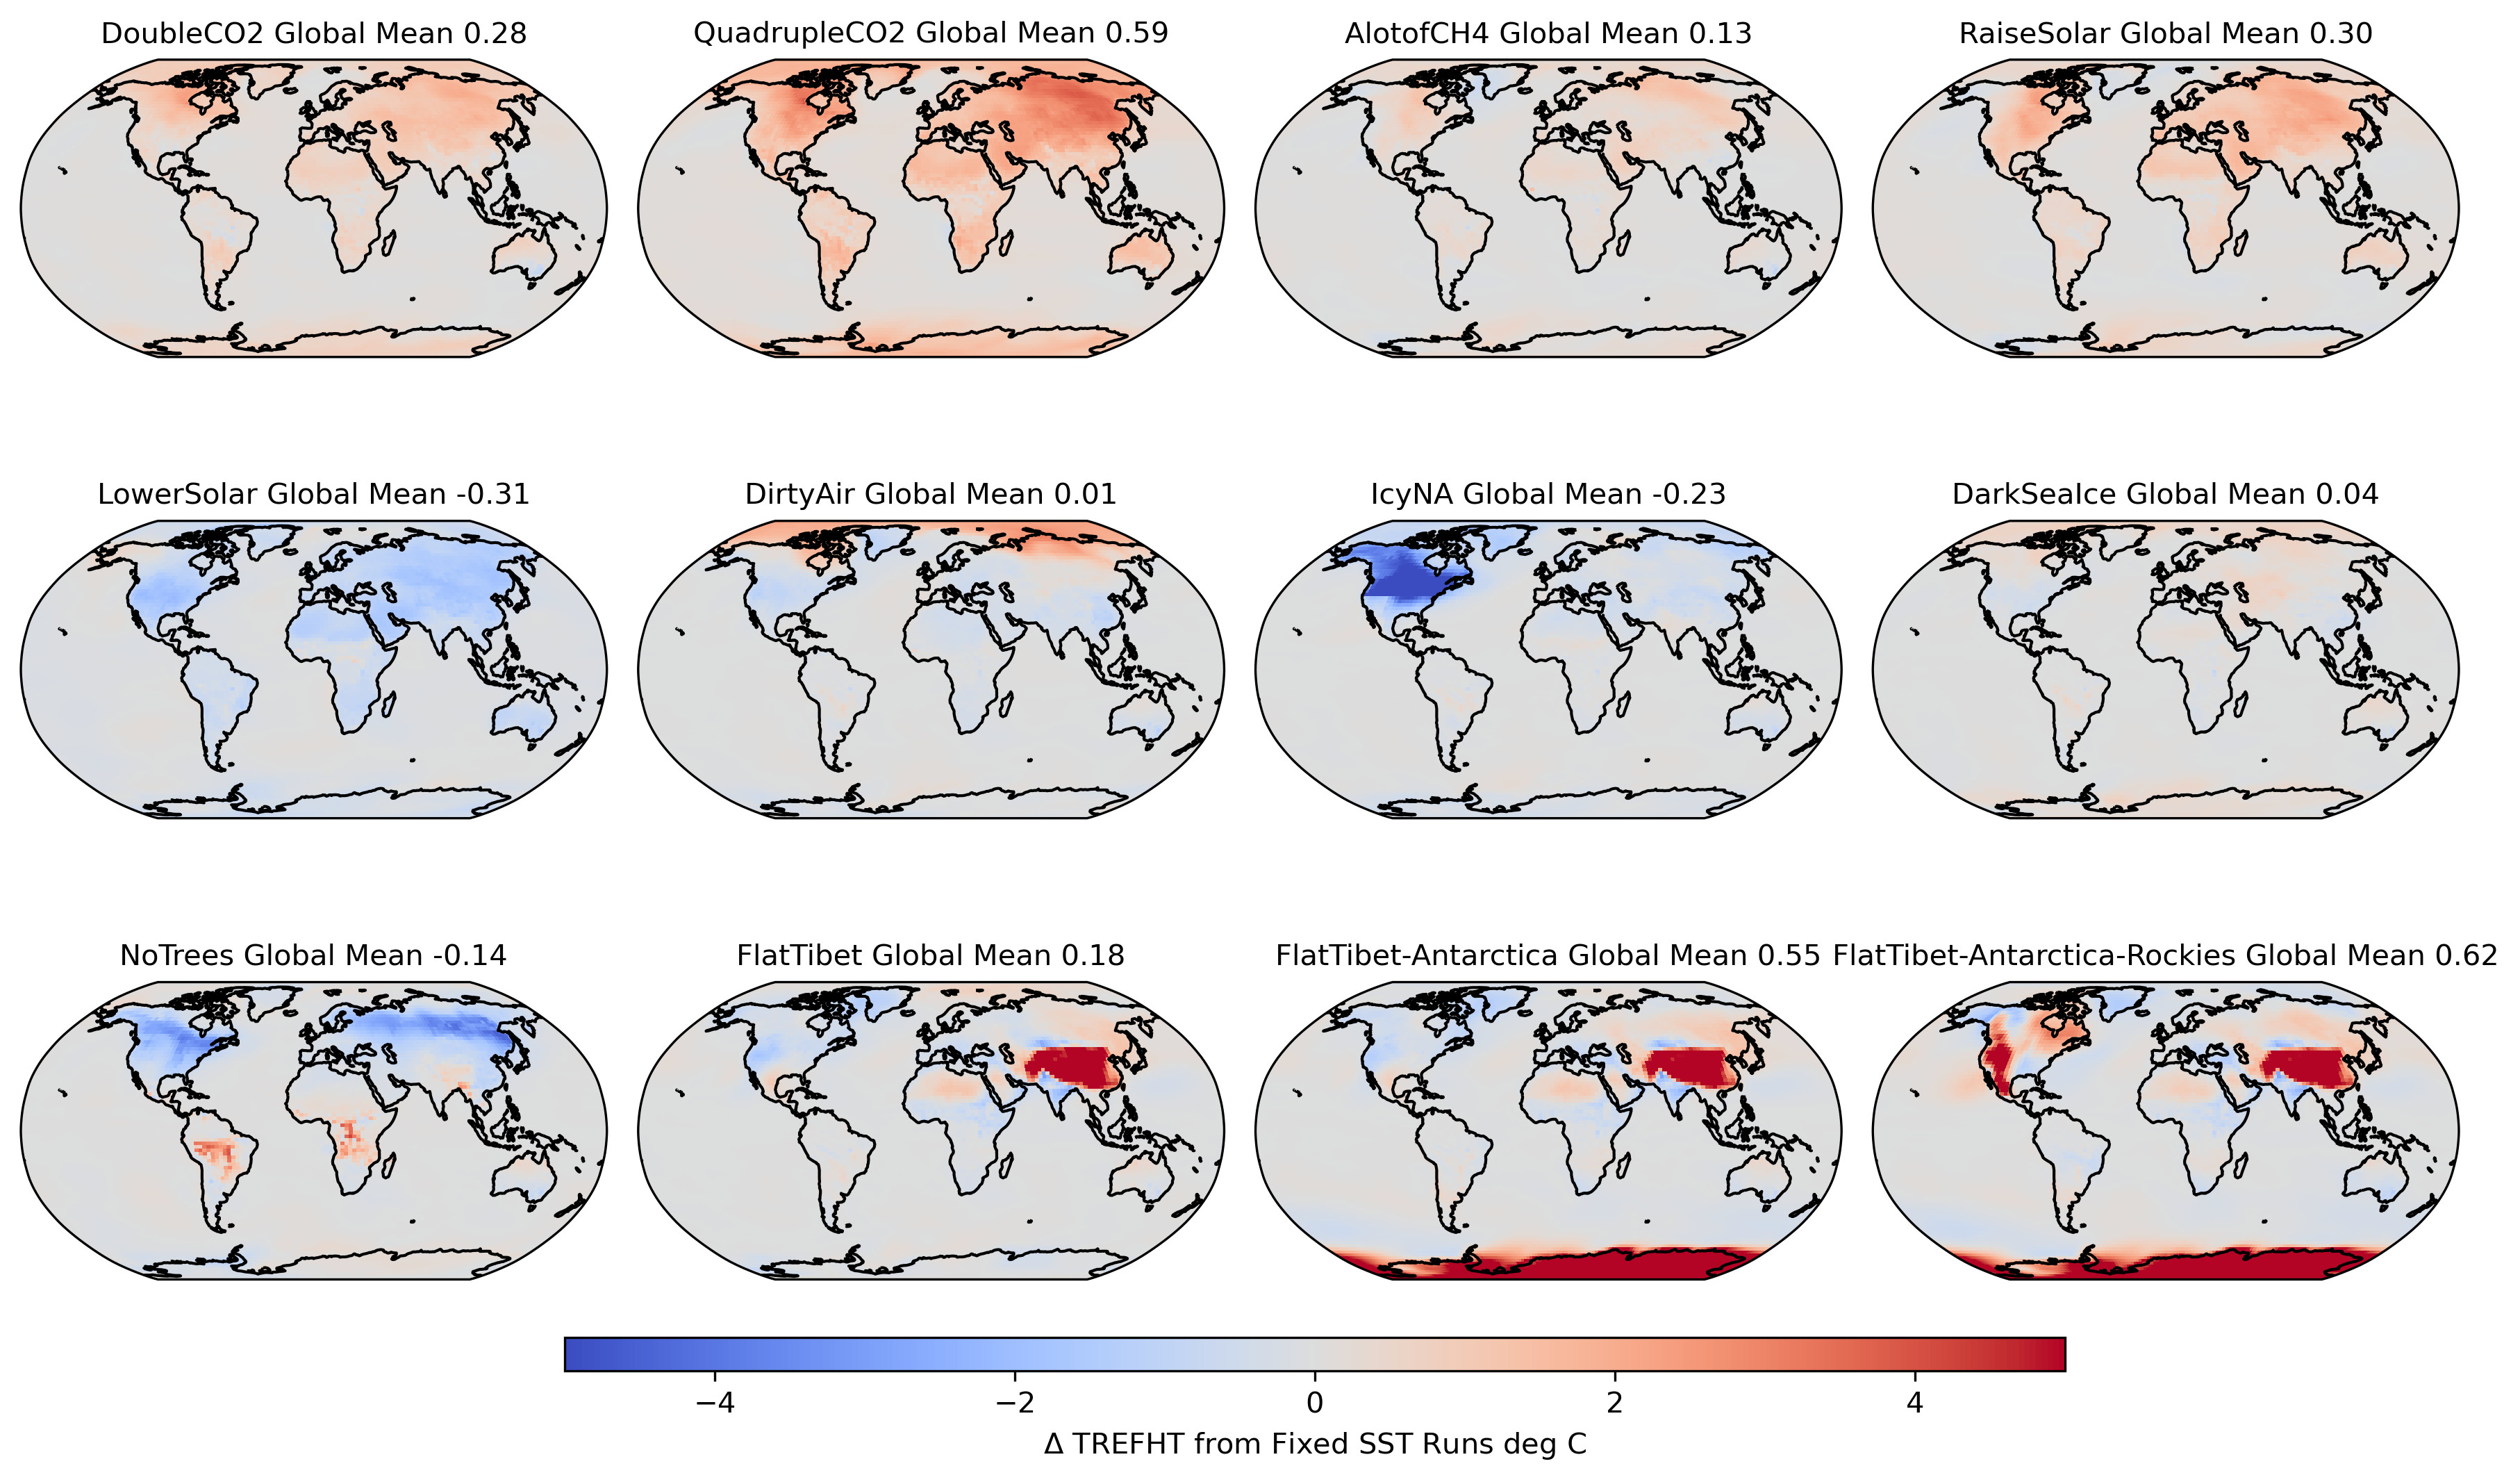

In [20]:
fig,Tglobalmeans = plotAll_Anomalies(trefht_all_SST,vmax=5,title='$\Delta$ TREFHT from Fixed SST Runs deg C')
np.save('TREFHT_FixedSST_GlobalMeans', Tglobalmeans)
fig.savefig('TREFHT_FixedSSTRuns.png',
            bbox_inches="tight", dpi=300)

In [21]:
# FYI you can read the global means that were saved back in here or elsewhere like so
glob=np.load('TREFHT_FixedSST_GlobalMeans.npy')
print(glob)

[ 0.27645322  0.5899896   0.13198341  0.29669373 -0.3072415   0.00722291
 -0.23313064  0.03675957 -0.13597014  0.18489107  0.54664314  0.62340482]


# Finally for Fully Coupled Runs

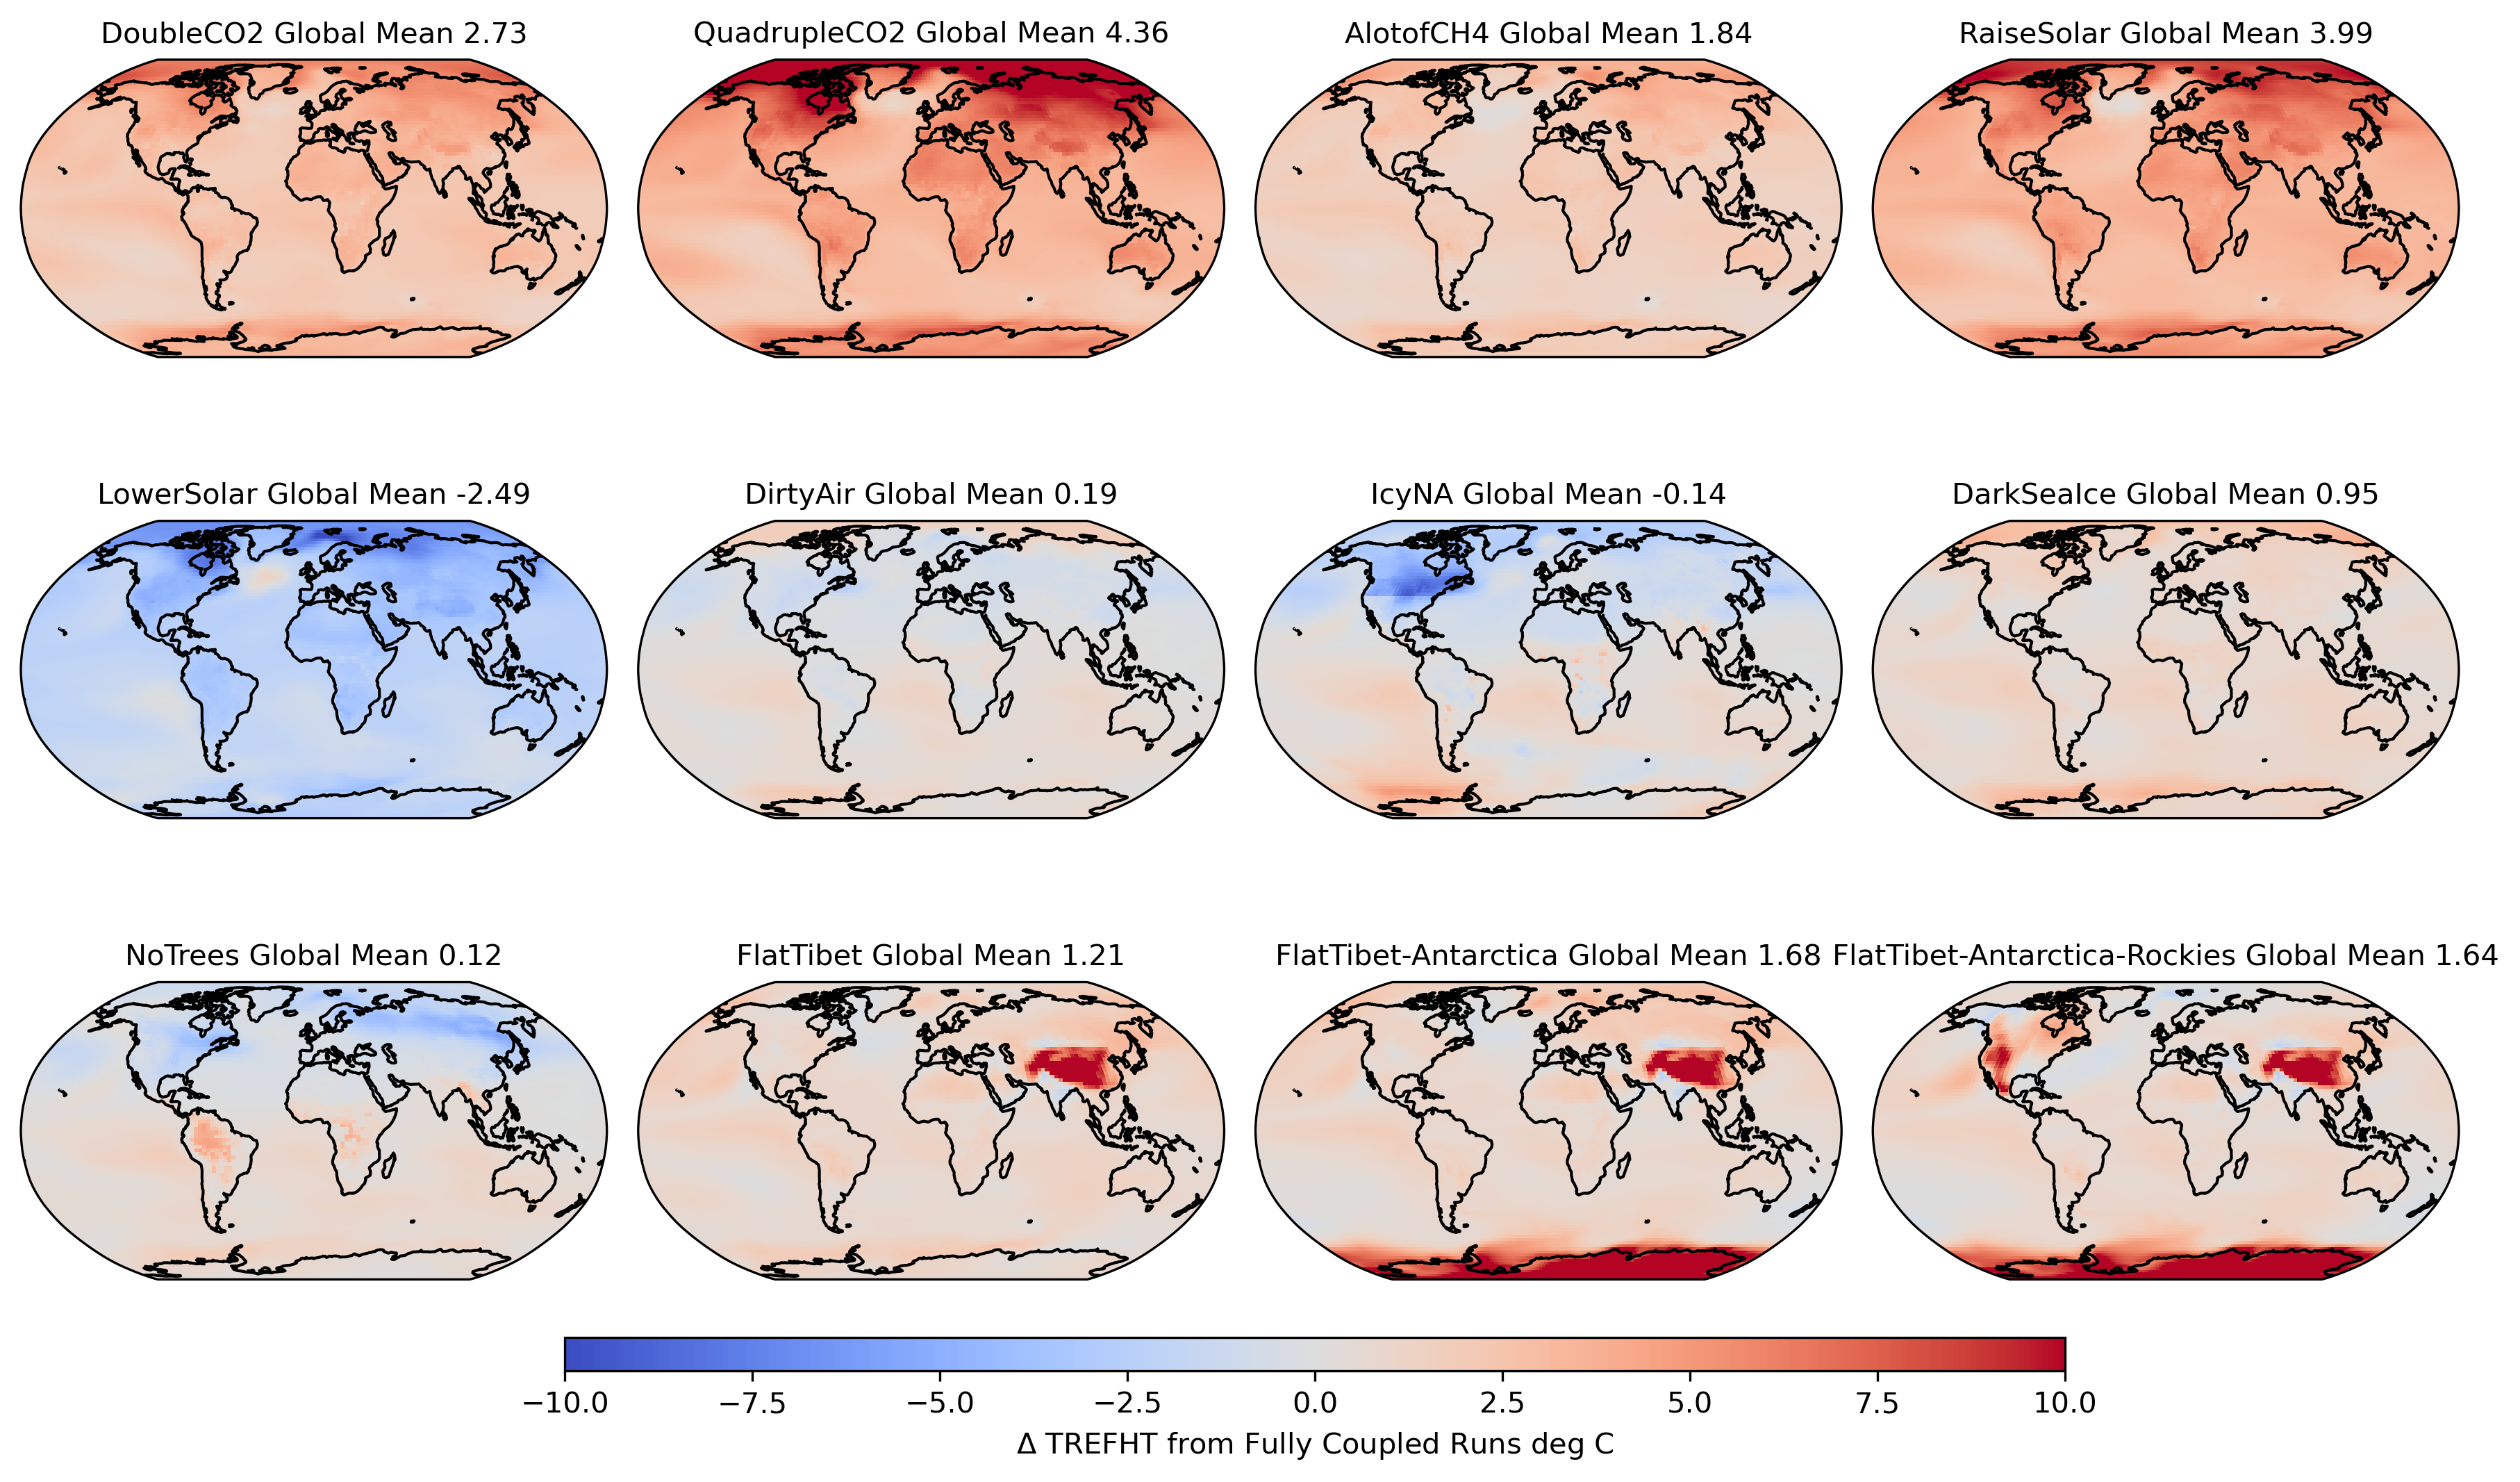

In [12]:
fig,Tglobalmeans = plotAll_Anomalies(trefht_all,vmax=10,title='$\Delta$ TREFHT from Fully Coupled Runs deg C')
np.save('TREFHT_FullyCoupled_GlobalMeans', Tglobalmeans)
fig.savefig('TREFHT_FullyCoupledRuns.png',
            bbox_inches="tight", dpi=300)
# beware, I think the piControl is high by about 0.5 deg C, I'm rerunning now, so you can get a better result in a few days when you rerun this

# Finally for those who want to know how to convert from sigma level to pressure level 

In [ ]:
# Get a field from a single CAM variable like U, this time use the CombineDSNicely function so we get a DataSet with PS
U_all=CombineDSNicely(ddir,casenames,prefernames,'U')

In [51]:
import scipy.interpolate as interp
from xgcm import Grid

def regrid_xgcm(ds, ps, p_target, var):
    """
    Regrid data from hybrid-sigma coordinates to constant pressure levels using xgcm
    Uses xgcm.Grid.transform
    
    Parameters
    ----------
    ds: xarray Dataset
        A dataset containing the variables to be regridded
    ps: xarray DataArray
        DataArray containing surface pressure data
    p_target: array-like
        Array containing pressure levels in hPa to interpolate to
    var: string, regrid this variable
        
    Returns
    -------
    dsout: xarray Dataset
        A dataset containing the variables regridded onto pressure levels        
    
    """
    
    p = (ds['hyam']*ds['P0'] + ds['hybm']*ps)/100
    ds = ds.assign({'p': np.log(p)})
    grid = Grid(ds, coords={'Z': {'center': 'lev'}}, periodic=False)
    
    dsout = xr.Dataset(coords={"plev": ("plev", p_target),  # there is probablay a better way to do this automatically, helps if time is included
                              "lat": ("lat", ds.lat.data),
                              "lon": ("lon", ds.lon.data)})
    
    data = ds[var]
    varout = grid.transform(data,
                            'Z',
                            np.log(p_target),
                            target_data=ds.p)
    varout = varout.rename({"p": "plev"})
    varout = varout.assign_coords({'plev': p_target})
    dsout = dsout.assign({var: varout})
    dsout = dsout[var]
    return dsout

In [60]:
lev = np.array([200., 500., 850.])

ds=U_all.sel(casename='piControl')
U_piControl = regrid_xgcm(ds, ds["PS"], lev, 'U')

ds=U_all.sel(casename='FlatTibet-Antarctica-Rockies')
U_flat = regrid_xgcm(ds, ds["PS"], lev, 'U')


/glade/u/apps/opt/conda/envs/npl-2024a/lib/python3.11/site-packages/xgcm/grid.py:989: FutureWarning: From version 0.8.0 the Axis computation methods will be removed, in favour of using the Grid computation methods instead. i.e. use `Grid.transform` instead of `Axis.transform`
  warnings.warn(


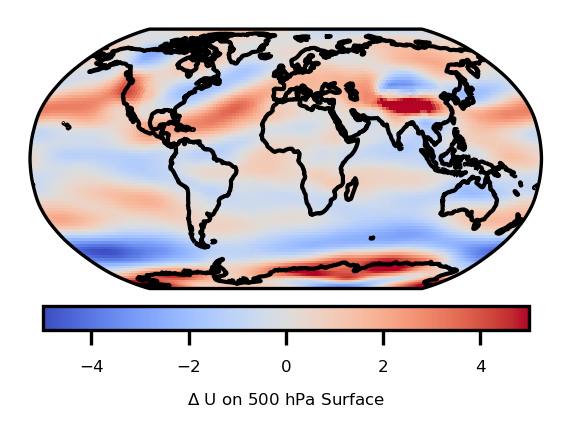

In [63]:
plotprojection( (U_flat-U_piControl).isel(plev=1) ,vmax=5,title='$\Delta$ U on 500 hPa Surface')

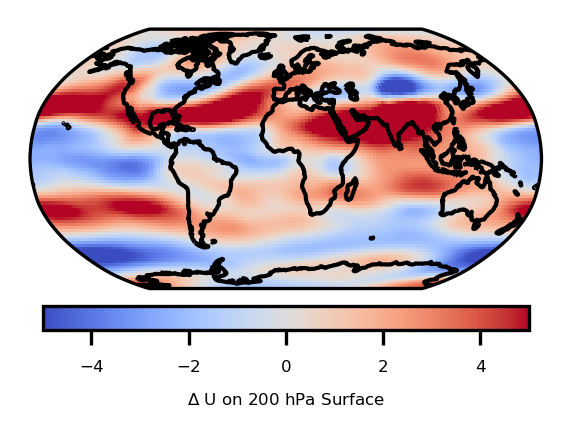

In [64]:
plotprojection( (U_flat-U_piControl).isel(plev=0) ,vmax=5,title='$\Delta$ U on 200 hPa Surface')

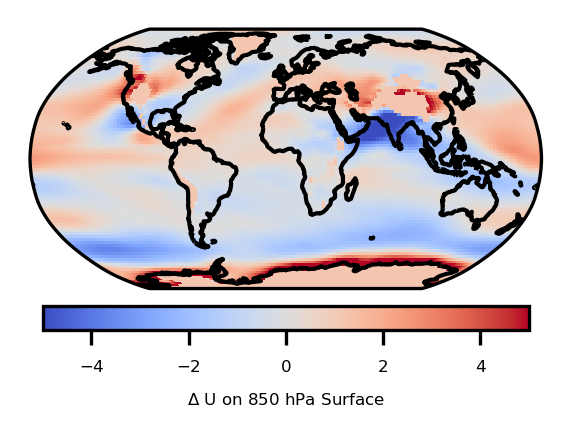

In [67]:
plotprojection( (U_flat-U_piControl).isel(plev=2) ,vmax=5,title='$\Delta$ U on 850 hPa Surface') 
# note there are some areas with np.nan at 850 hPa in piControl that look funky when differenced, should fix 